In [1]:
! pip install autoviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [5]:
orig_inputs = np.load ("./initial_inputs.npy")
orig_outputs = np.load ("./initial_outputs.npy")

In [7]:
orig_inputs

array([[0.66579958, 0.12396913],
       [0.87779099, 0.7786275 ],
       [0.14269907, 0.34900513],
       [0.84527543, 0.71112027],
       [0.45464714, 0.29045518],
       [0.57771284, 0.77197318],
       [0.43816606, 0.68501826],
       [0.34174959, 0.02869772],
       [0.33864816, 0.21386725],
       [0.70263656, 0.9265642 ]])

In [9]:
# Add the new data points
new_data = np.array([[0.577713, 0.771973], [0.716937, 0.912887], [0.24, 0.5], [0.5, 0.6], [0.5766, 0.612396]])
inputs = np.vstack([orig_inputs, new_data])

len(orig_inputs), len(inputs)

(10, 15)

In [11]:
inputs

array([[0.66579958, 0.12396913],
       [0.87779099, 0.7786275 ],
       [0.14269907, 0.34900513],
       [0.84527543, 0.71112027],
       [0.45464714, 0.29045518],
       [0.57771284, 0.77197318],
       [0.43816606, 0.68501826],
       [0.34174959, 0.02869772],
       [0.33864816, 0.21386725],
       [0.70263656, 0.9265642 ],
       [0.577713  , 0.771973  ],
       [0.716937  , 0.912887  ],
       [0.24      , 0.5       ],
       [0.5       , 0.6       ],
       [0.5766    , 0.612396  ]])

In [13]:
outputs = np.append(orig_outputs, 0.13026695633593488)
outputs = np.append(outputs, 0.5400783739018566)
outputs = np.append(outputs, -0.04494767512180412)
outputs = np.append(outputs, 0.8551207080081483)
outputs = np.append(outputs, 0.08142912389266313)
len(outputs)

15

In [15]:
orig_outputs

array([ 0.53899612,  0.42058624, -0.06562362,  0.29399291,  0.21496451,
        0.02310555,  0.24461934,  0.03874902, -0.01385762,  0.61120522])

In [17]:
outputs

array([ 0.53899612,  0.42058624, -0.06562362,  0.29399291,  0.21496451,
        0.02310555,  0.24461934,  0.03874902, -0.01385762,  0.61120522,
        0.13026696,  0.54007837, -0.04494768,  0.85512071,  0.08142912])

In [19]:
orig_data = {'feature1': orig_inputs[:,0],
        'feature2': orig_inputs[:,1],
        'target': orig_outputs
       }

orig_df = pd.DataFrame(orig_data)
orig_df

,feature1,feature2,target
0,0.665800,0.123969,0.538996
1,0.877791,0.778628,0.420586
2,0.142699,0.349005,-0.065624
3,0.845275,0.711120,0.293993
4,0.454647,0.290455,0.214965
5,0.577713,0.771973,0.023106
6,0.438166,0.685018,0.244619
7,0.341750,0.028698,0.038749
8,0.338648,0.213867,-0.013858
9,0.702637,0.926564,0.611205


In [21]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,target
0,0.665800,0.123969,0.538996
1,0.877791,0.778628,0.420586
2,0.142699,0.349005,-0.065624
3,0.845275,0.711120,0.293993
4,0.454647,0.290455,0.214965
5,0.577713,0.771973,0.023106
6,0.438166,0.685018,0.244619
7,0.341750,0.028698,0.038749
8,0.338648,0.213867,-0.013858
9,0.702637,0.926564,0.611205


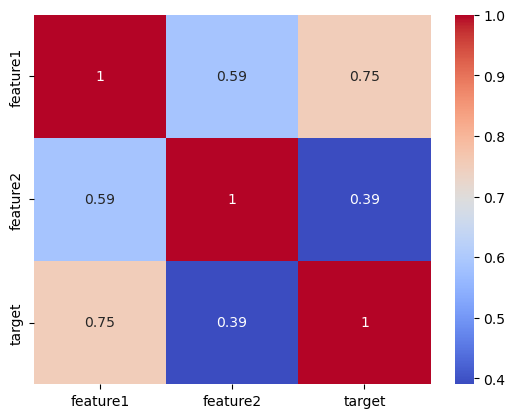

In [23]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = orig_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

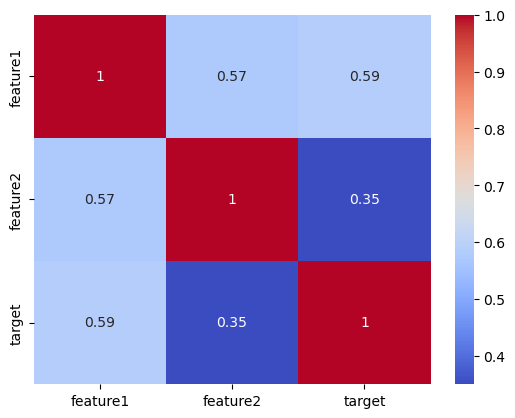

In [23]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  15 non-null     float64
 1   feature2  15 non-null     float64
 2   target    15 non-null     float64
dtypes: float64(3)
memory usage: 492.0 bytes


In [27]:
orig_df.describe()

,feature1,feature2,target
count,10.000000,10.000000,10.000000
mean,0.538513,0.487930,0.230674
std,0.237188,0.320245,0.237555
min,0.142699,0.028698,-0.065624
25%,0.365854,0.233014,0.027016
50%,0.516180,0.517012,0.229792
75%,0.693427,0.756760,0.388938
max,0.877791,0.926564,0.611205


In [29]:
df.describe()

,feature1,feature2,target
count,15.000000,15.000000,15.000000
mean,0.533092,0.551770,0.257912
std,0.212350,0.286773,0.279125
min,0.142699,0.028698,-0.065624
25%,0.389958,0.319730,0.030927
50%,0.576600,0.612396,0.214965
75%,0.684218,0.771973,0.479791
max,0.877791,0.926564,0.855121


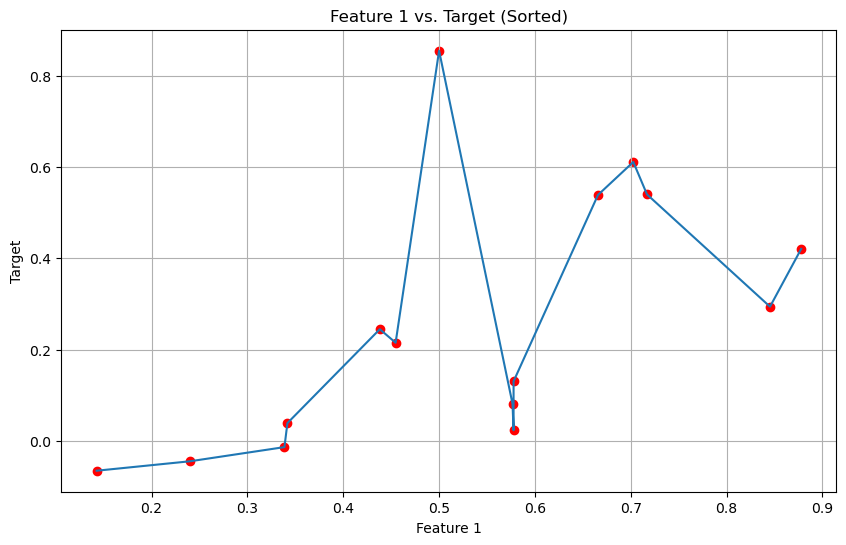

In [31]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

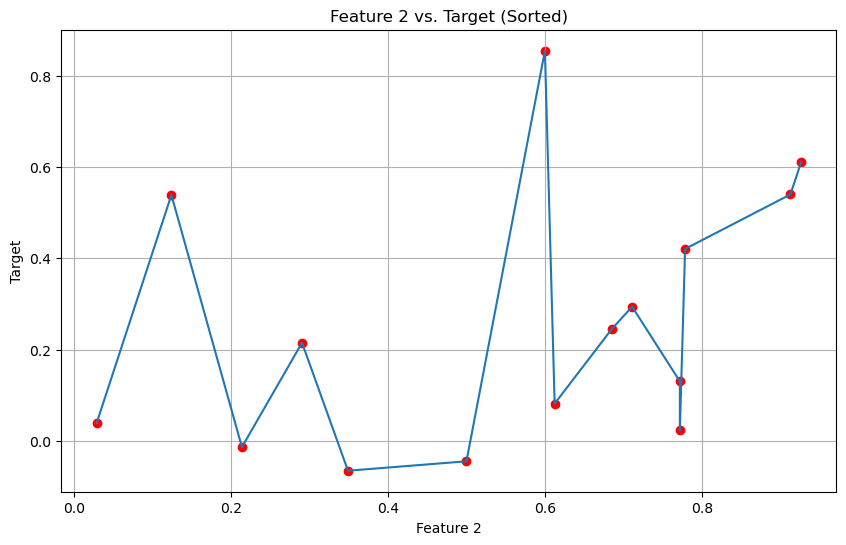

In [33]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [37]:
# Define the kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the model
gpr.fit(df[['feature1', 'feature2']], df['target'])

# Example prediction
new_features = np.array([[0.6, 0.8]])
predicted_target, sigma = gpr.predict(new_features, return_std=True)

print(f"Predicted target: {predicted_target[0]}")
print(f"Standard deviation: {sigma[0]}")
gpr

Predicted target: -5.126982086861972
Standard deviation: 31.622712870210293


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [35]:
# Define the parameter grid for the Gaussian Process Regressor
print('Running.........')

param_grid = {
    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2],
    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
    'normalize_y': [True],
}


# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
X = df[['feature1', 'feature2']]
y = df['target']
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_gpr = grid_search.best_estimator_

# Use the best estimator to predict the target variable
y_pred = best_gpr.predict(X)

best_gpr

Running.........


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:

Best parameters: {'alpha': 0.01, 'kernel': 1**2 * RBF(length_scale=0.1), 'n_restarts_optimizer': 15, 'normalize_y': True}
Best score: -0.07389472683297285


GaussianProcessRegressor(alpha=0.01, kernel=1**2 * RBF(length_scale=0.1),
                         n_restarts_optimizer=15, normalize_y=True)

In [37]:
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(alpha=0.01, kernel=1**2 * RBF(length_scale=0.1),
                         n_restarts_optimizer=15, normalize_y=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


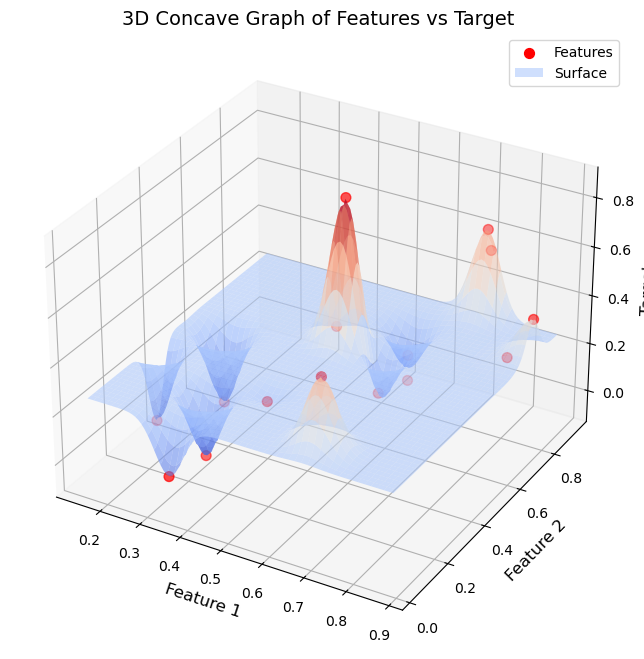

In [39]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature1'], df['feature2'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 100),
                   np.linspace(df['feature2'].min(), df['feature2'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature1', 'feature2']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

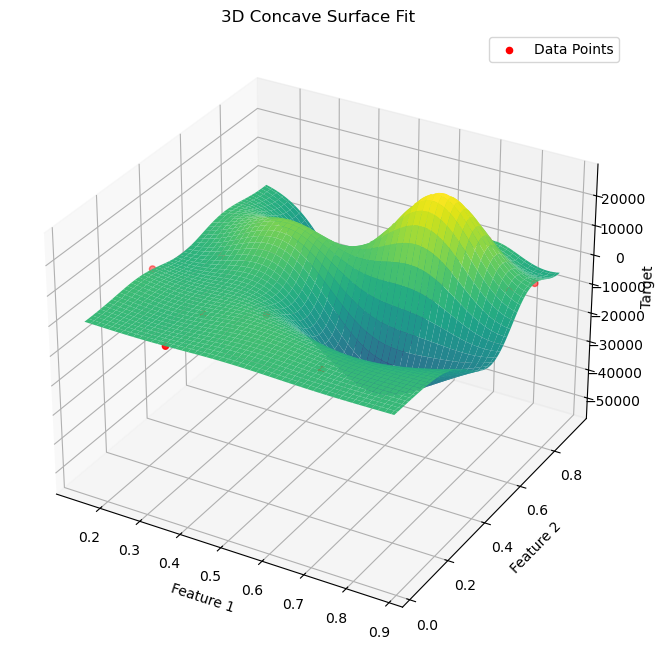

In [41]:
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature2']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.
#rbfi = Rbf(feature1, feature2, target, function='inverse')

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

In [43]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")

Feature 1 at peak of target: 0.5
Feature 2 at peak of target: 0.6


In [45]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")

Feature 1 at peak of target: 0.14269907423594608
Feature 2 at peak of target: 0.34900513057320015


In [47]:
feature1 = df['feature1']
feature2 = df['feature2']
target = df['target']

# Create the radial basis function interpolator
#rbfi = Rbf(feature1, feature2, target, function='multiquadric')

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)

# Find the minimum target value and its corresponding feature values
min_index = np.argmin(zi)
min_target = zi.flatten()[min_index]
min_feature1 = xi.flatten()[min_index]
min_feature2 = yi.flatten()[min_index]

print(f"The dip of the target is at:")
print(f"feature1: {min_feature1}")
print(f"feature2: {min_feature2}")
print(f"target: {min_target}")


The dip of the target is at:
feature1: 0.4619814210506281
feature2: 0.8812174057413513
target: -51764.76436246936


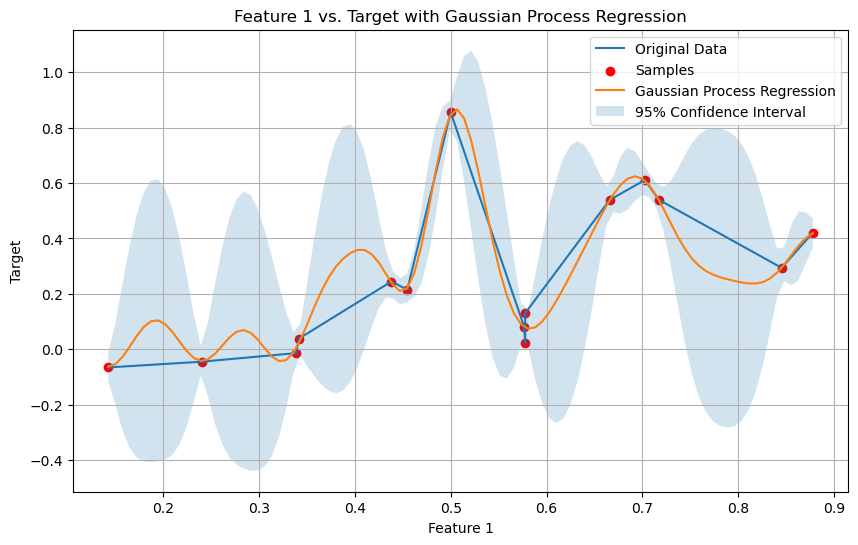

1.03**2 * RBF(length_scale=0.0291)


In [49]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature1']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define a more complex kernel with a ConstantKernel, RBF, and WhiteKernel
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) + WhiteKernel(noise_level=1e-5)


# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.01, n_restarts_optimizer=10, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate points for prediction
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel parameters

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


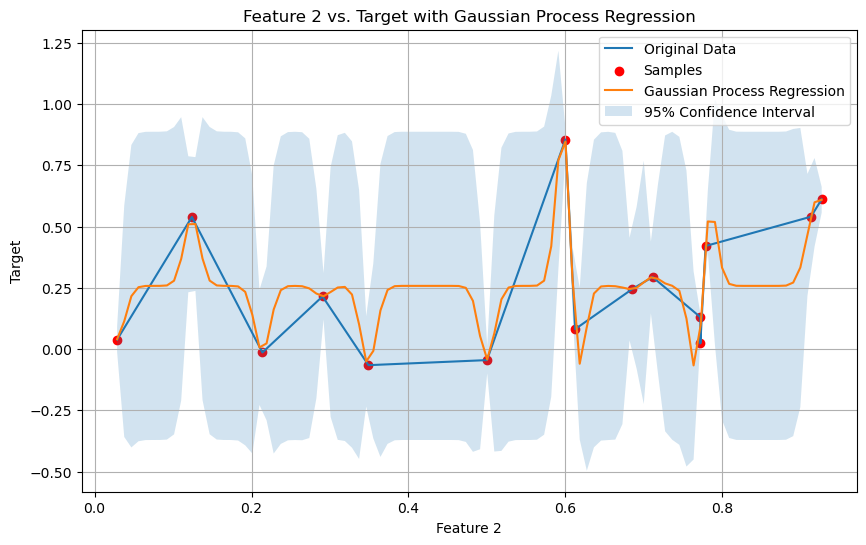

1.19**2 * RBF(length_scale=0.01)


In [51]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature2']].values  # Use only 'feature2' as input
y = df_sorted['target'].values

# Define a more complex kernel with a ConstantKernel, RBF, and WhiteKernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) + WhiteKernel(noise_level=1e-5)


# Create and fit the Gaussian Process Regressor with improved kernel and hyperparameters
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.01, n_restarts_optimizer=10, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate points for prediction
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel parameters

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


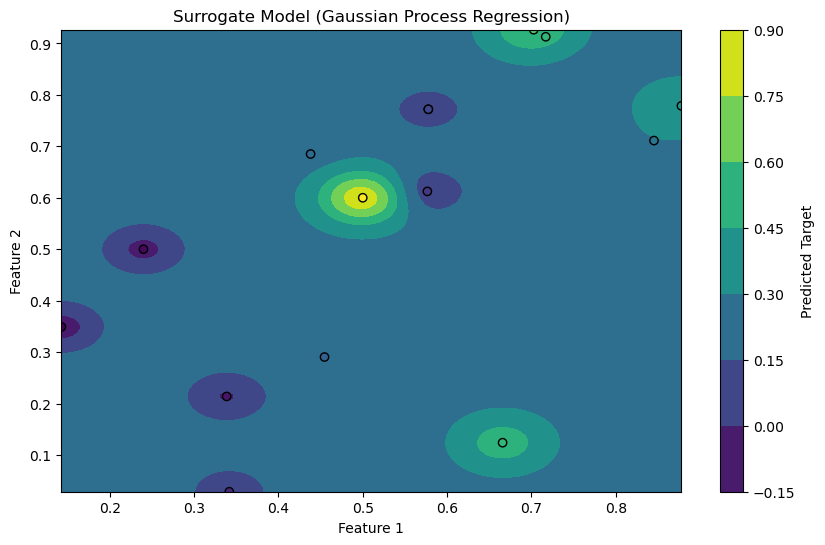

In [53]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature1', 'feature2']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm

def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

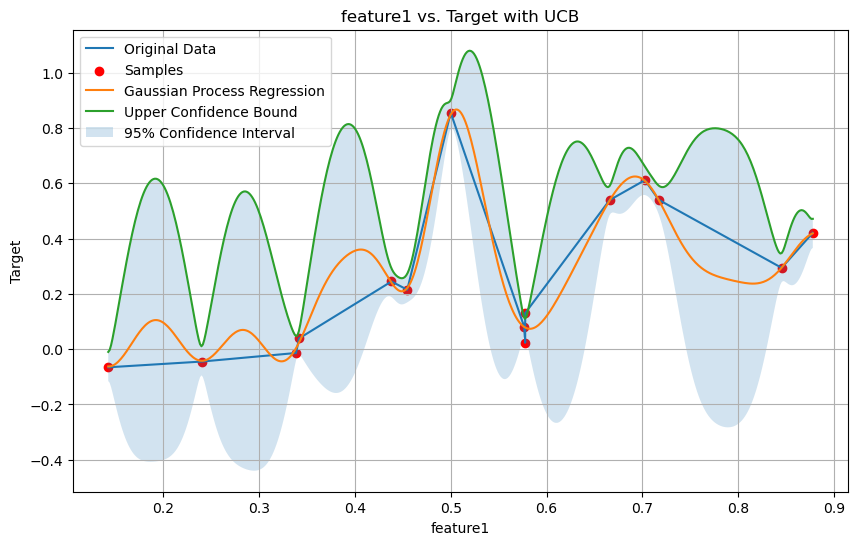

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


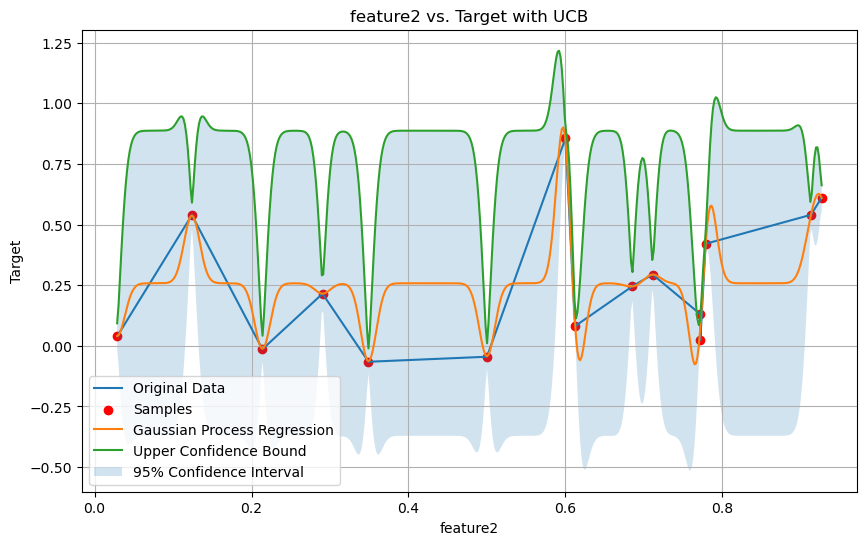

In [57]:
for feature in ['feature1', 'feature2']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Upper Confidence Bound
    upper_confidence_bound = y_pred + 1.96 * sigma

    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, upper_confidence_bound, label='Upper Confidence Bound')
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with UCB')
    plt.legend()
    plt.grid(True)
    plt.show()

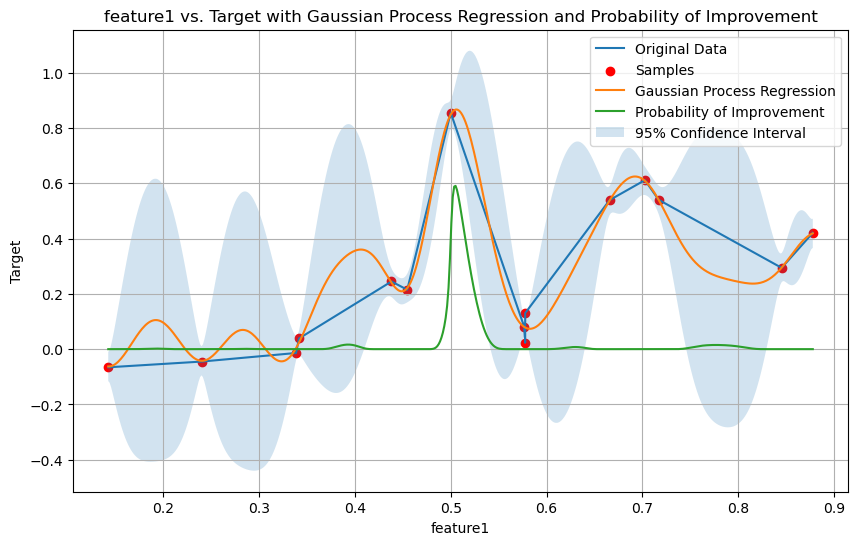

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


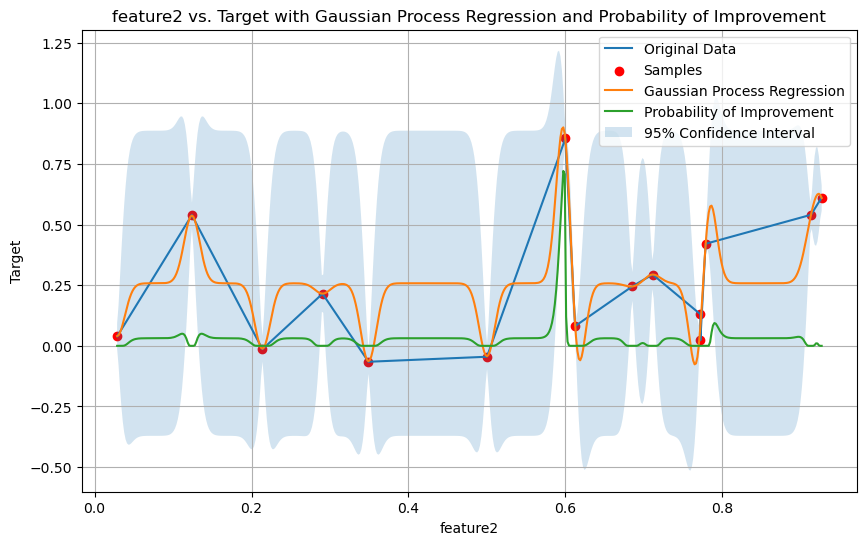

In [59]:
for feature in ['feature1', 'feature2']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Probability of Improvement
    y_best = np.max(y)  # Current best observed target value
    poi = norm.cdf((y_pred - y_best) / sigma)

    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, poi, label='Probability of Improvement') #Plot POI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Probability of Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

In [61]:
print('Running...........')

# Find the best feature1 value based on the maximum EI
def find_best_feature1(df, gpr):
    # Generate a wide range of feature1 values for evaluation.
    X_pred = np.linspace(df['feature1'].min() - 0.1, df['feature1'].max() + 0.1, 500).reshape(-1, 1)
    ei = expected_improvement(X_pred, gpr)
    best_feature1 = X_pred[np.argmax(ei)][0]  # Find the feature1 value with max EI
    return best_feature1

# Prepare data for feature1
X_feature1 = df[['feature1']].values
y_feature1 = df['target'].values

# Define the kernel for feature1
#kernel_feature1 = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) + WhiteKernel(noise_level=1e-5)

# Fit the GPR model for feature1
#gpr_feature1 = GaussianProcessRegressor(kernel=kernel_feature1, alpha=0.01, n_restarts_optimizer=10, random_state=0)
gpr.fit(X_feature1, y_feature1)

# Find the best feature1
best_feature1 = find_best_feature1(df, gpr)
print(f"Best feature1 value for maximum EI: {best_feature1}")

Running...........
Best feature1 value for maximum EI: 0.9440602185230479


In [69]:
print('Running...........')

# Find the best feature1 value based on the maximum EI
def find_best_feature2(df, gpr):
    # Generate a wide range of feature1 values for evaluation.
    X_pred = np.linspace(df['feature2'].min() - 0.1, df['feature2'].max() + 0.1, 500).reshape(-1, 1)
    ei = expected_improvement(X_pred, gpr)
    best_feature2 = X_pred[np.argmax(ei)][0]  # Find the feature1 value with max EI
    return best_feature2

# Prepare data for feature1
X_feature2 = df[['feature2']].values
y_feature2 = df['target'].values

# Define the kernel for feature1
#kernel_feature1 = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) + WhiteKernel(noise_level=1e-5)

# Fit the GPR model for feature1
#gpr_feature1 = GaussianProcessRegressor(kernel=kernel_feature1, alpha=0.01, n_restarts_optimizer=10, random_state=0)
gpr.fit(X_feature2, y_feature2)

# Find the best feature1
best_feature2 = find_best_feature2(df, gpr)
print(f"Best feature2 value for maximum EI: {best_feature2}")

Running...........
Best feature2 value for maximum EI: 0.5843374199455992


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [81]:
best_feature_values = {}

for feature in ['feature1', 'feature2']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values
    kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Use the prediction with the highest value (you can change the acquisition function if needed)
    best_index = np.argmax(y_pred)
    best_feature_value = X_pred[best_index][0]
    best_feature_values[feature] = best_feature_value

# Create a new data array with the best values
new_data_array = np.array(list(best_feature_values.values()))

# Display the results formatted to six significant figures
print("Single Best Values for Each Feature (6 significant figures):")
for feature, value in best_feature_values.items():
    print(f"{feature}: {value:.6f}")

print("\nNew Data Array:")
new_data_array

Single Best Values for Each Feature (6 significant figures):
feature1: 0.506562
feature2: 0.597287

New Data Array:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


array([0.50656221, 0.59728651])

In [83]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
new_input_data = new_data_array
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=2)

print("New Input Data (with noise):", new_input_data)

New Input Data (with noise): [0.51408277 0.59518078]


In [85]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.514083, 0.595181]


In [87]:
inputs

array([[0.66579958, 0.12396913],
       [0.87779099, 0.7786275 ],
       [0.14269907, 0.34900513],
       [0.84527543, 0.71112027],
       [0.45464714, 0.29045518],
       [0.57771284, 0.77197318],
       [0.43816606, 0.68501826],
       [0.34174959, 0.02869772],
       [0.33864816, 0.21386725],
       [0.70263656, 0.9265642 ],
       [0.577713  , 0.771973  ],
       [0.716937  , 0.912887  ],
       [0.24      , 0.5       ],
       [0.5       , 0.6       ],
       [0.5766    , 0.612396  ]])

In [89]:
# Add the new data points
next_inputs = np.vstack([inputs, new_input_data])

len(next_inputs), len(inputs)

(16, 15)

In [91]:
next_inputs

array([[0.66579958, 0.12396913],
       [0.87779099, 0.7786275 ],
       [0.14269907, 0.34900513],
       [0.84527543, 0.71112027],
       [0.45464714, 0.29045518],
       [0.57771284, 0.77197318],
       [0.43816606, 0.68501826],
       [0.34174959, 0.02869772],
       [0.33864816, 0.21386725],
       [0.70263656, 0.9265642 ],
       [0.577713  , 0.771973  ],
       [0.716937  , 0.912887  ],
       [0.24      , 0.5       ],
       [0.5       , 0.6       ],
       [0.5766    , 0.612396  ],
       [0.51408277, 0.59518078]])

In [93]:
next_data = {'feature1': next_inputs[:,0],
        'feature2': next_inputs[:,1],
       }

next_df = pd.DataFrame(next_data)
next_df

,feature1,feature2
0,0.665800,0.123969
1,0.877791,0.778628
2,0.142699,0.349005
3,0.845275,0.711120
4,0.454647,0.290455
5,0.577713,0.771973
6,0.438166,0.685018
7,0.341750,0.028698
8,0.338648,0.213867
9,0.702637,0.926564


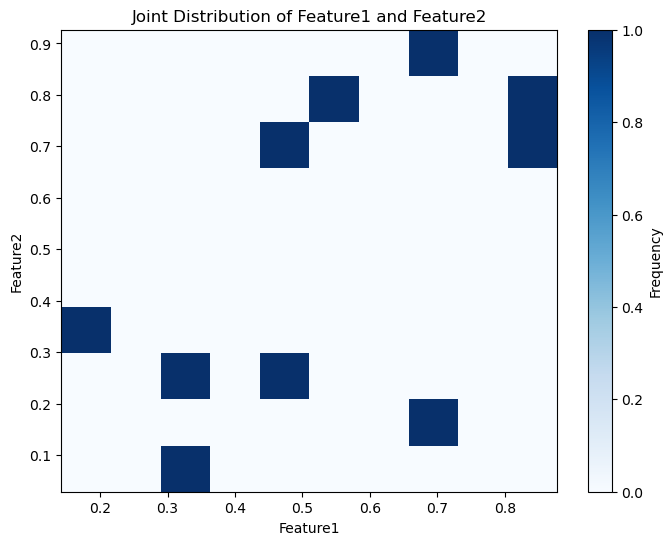

In [95]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist2d(orig_df['feature1'], orig_df['feature2'], bins=10, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Joint Distribution of Feature1 and Feature2')
plt.xlabel('Feature1')
_ = plt.ylabel('Feature2')

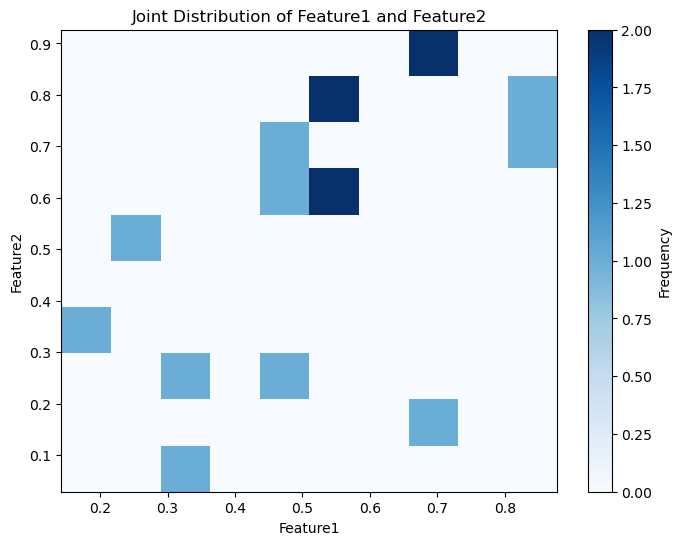

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist2d(next_df['feature1'], next_df['feature2'], bins=10, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Joint Distribution of Feature1 and Feature2')
plt.xlabel('Feature1')
_ = plt.ylabel('Feature2')

In [99]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.514083, 0.595181]


In [123]:
new_input_data = ([0.5, 0.6])
new_input_data

[0.5, 0.6]

In [101]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.514083, 0.595181]


In [103]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")

Feature 1 at peak of target: 0.5
Feature 2 at peak of target: 0.6


In [105]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")

Feature 1 at peak of target: 0.14269907423594608
Feature 2 at peak of target: 0.34900513057320015


In [107]:
next_inputs

array([[0.66579958, 0.12396913],
       [0.87779099, 0.7786275 ],
       [0.14269907, 0.34900513],
       [0.84527543, 0.71112027],
       [0.45464714, 0.29045518],
       [0.57771284, 0.77197318],
       [0.43816606, 0.68501826],
       [0.34174959, 0.02869772],
       [0.33864816, 0.21386725],
       [0.70263656, 0.9265642 ],
       [0.577713  , 0.771973  ],
       [0.716937  , 0.912887  ],
       [0.24      , 0.5       ],
       [0.5       , 0.6       ],
       [0.5766    , 0.612396  ],
       [0.51408277, 0.59518078]])

In [109]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.514083, 0.595181]
